# INSTAGRAM TOP 200 INFLUENCERS

### Introduction

Instagram has become a major social media platform with over one billion active users. As such, it has become an essential tool for businesses and individuals looking to market their products and services. One way to utilize the platform effectively is by working with top influencers. These individuals have a large following and can help promote products to a vast audience. In this analysis, we will explore the top four influencers on Instagram, examine their profiles, and identify the key factors contributing to their success.

### Goal
This analysis aims to provide insights into the top 200 influencers on Instagram by identifying the most popular categories and channels. By examining the data, we hope to gain a deeper understanding of what makes these influencers successful and what strategies they use to engage with their audiences. Through this analysis, we hope to provide valuable information for individuals and businesses looking to utilize Instagram as a marketing tool.

### Brief
The dataset we are analyzing includes information on the top 200 Instagram influencers, including their rank, name, channel information, category, posts, followers, average likes, engagement rate. The data can provide valuable insights into the most popular categories and channels on Instagram, as well as the factors that contribute to high engagement rates and follower counts.


------------------------------------------------------------------------------------------

### Getting started

For the purpose of this analysis, we will use the following Python libraries:

*Pandas is a Python library for data manipulation and analysis, allowing for the handling of various data formats and manipulation through data frames.*

*Matplotlib is a data visualization library used for creating different types of charts and plots, with high customization options.*

*Seaborn is a data visualization library built on Matplotlib that provides a high-level interface for creating informative and attractive statistical graphics, useful for visualizing patterns, relationships, and trends in the data.*

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


In [5]:
def printBold(strTxt):
    print('\n \033[1m ' + strTxt + ' \n')

### *Preparing Data for Analysis*
This section involves cleaning, organizing, and transforming data to ensure its accuracy, consistency, and relevance for analysis. The goal is to avoid errors and to make sure that the analysis is based on reliable data.

In [8]:
#reading data
df = pd.read_csv('data.csv')
df['Count'] = 1
df

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate,Count
0,1,instagram,brand,photography,7.3K,580.1M,7.31K,0.1%,1
1,2,cristiano,male,"Health, Sports & Fitness",3.4K,519.9M,3.41K,1.4%,1
2,3,leomessi,male,"Health, Sports & Fitness",1K,403.7M,0.97K,1.7%,1
3,4,kyliejenner,female,entertainment,7K,375.9M,7.02K,1.7%,1
4,5,selenagomez,female,entertainment,1.8K,365.3M,1.85K,1.1%,1
...,...,...,...,...,...,...,...,...,...
195,196,fcbayern,male,"Health, Sports & Fitness",16.8K,35.4M,16.78K,0.6%,1
196,197,colesprouse,male,entertainment,1.1K,35.3M,1.14K,3.5%,1
197,198,shaymitchell,male,entertainment,6.3K,35.1M,6.31K,1.2%,1
198,199,ivetesangalo,female,entertainment,7.8K,35M,7.77K,0.4%,1


In [9]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          200 non-null    int64 
 1   name          200 non-null    object
 2   channel_Info  195 non-null    object
 3   Category      193 non-null    object
 4   Posts         200 non-null    object
 5   Followers     200 non-null    object
 6   Avg. Likes    200 non-null    object
 7   Eng Rate      200 non-null    object
 8   Count         200 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 14.2+ KB


In [10]:
#converting object data types to proper format
def convert_to_numeric(x):
    if isinstance(x, str):
        if x.endswith('K'):
            return float(x[:-1]) * 1000
        elif x.endswith('M'):
            return float(x[:-1]) * 1000000
        elif x.endswith('%'):
            return float(x[:-1]) / 100
        else:
            return pd.to_numeric(x, errors='coerce')
    else:
        return x
    
df['Posts'] = df['Posts'].apply(convert_to_numeric)
df['Followers'] = df['Followers'].apply(convert_to_numeric)
df['Avg. Likes'] = df['Avg. Likes'].apply(convert_to_numeric)
df['Eng Rate'] = df['Eng Rate'].apply(convert_to_numeric)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          200 non-null    int64  
 1   name          200 non-null    object 
 2   channel_Info  195 non-null    object 
 3   Category      193 non-null    object 
 4   Posts         200 non-null    float64
 5   Followers     200 non-null    float64
 6   Avg. Likes    200 non-null    float64
 7   Eng Rate      200 non-null    float64
 8   Count         200 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 14.2+ KB


In [11]:
#finding duplicates
df.duplicated().sum()

0

In [12]:
#updating null in channel info and category with 'misc'
df['Category'] = df['Category'].fillna('misc')
df['channel_Info'] = df['channel_Info'].fillna('misc')

#verifying updates
df.isnull().sum()

rank            0
name            0
channel_Info    0
Category        0
Posts           0
Followers       0
Avg. Likes      0
Eng Rate        0
Count           0
dtype: int64

### *Grouping and Aggregating Data*
In this section, we're going to group our data based on common attributes and summarize them using statistical functions. This will help us identify patterns and trends that we might not be able to see otherwise. By grouping and aggregating data, we can get a better understanding of our data and make more informed decisions based on it.

In [14]:
# Group data by byValue
def grouped(byValue):
    groupedBy = df.groupby(byValue).agg({
        'Posts': 'sum',
        'Followers': 'sum',
        'Avg. Likes': 'mean',
        'Eng Rate': 'mean',
        'Count': 'sum'
    }).reset_index()
    groupedBy['Avg. Likes'] = groupedBy['Avg. Likes'].round(0)
    groupedBy['Eng Rate'] = groupedBy['Eng Rate'].round(2)
    return groupedBy

In [15]:
groupedByChannel = grouped('channel_Info')
printBold('Group by Channel Info')
display(groupedByChannel)


  Group by Channel Info 



,channel_Info,Posts,Followers,Avg. Likes,Eng Rate,Count
0,brand,142100.0,1.630800e+09,9481.0,0.00,15
1,community,330600.0,8.101000e+08,25430.0,0.01,13
2,female,228402.0,6.832300e+09,3086.0,0.02,74
3,male,420553.0,7.600200e+09,4515.0,0.03,93
4,misc,1059.0,2.222000e+08,212.0,0.12,5


In [16]:
printBold("\n Group by Category")
groupedByCategory = grouped('Category')
display(groupedByCategory)


  
 Group by Category 



,Category,Posts,Followers,Avg. Likes,Eng Rate,Count
0,Beauty & Makeup,17600.0,1.474000e+08,5853.0,0.00,3
1,Craft/DIY,15500.0,4.620000e+07,15480.0,0.00,1
2,Finance,691.0,5.190000e+07,691.0,0.01,1
3,"Health, Sports & Fitness",369949.0,3.438300e+09,9483.0,0.01,39
4,Lifestyle,31000.0,5.810000e+07,31040.0,0.00,1
5,News & Politics,5202.0,1.560000e+08,1744.0,0.02,3
6,entertainment,546698.0,1.085980e+10,4234.0,0.03,129
7,fashion,47549.0,5.114000e+08,4756.0,0.03,10
8,food,12500.0,9.380000e+07,6260.0,0.01,2
9,misc,29325.0,9.844000e+08,4189.0,0.10,7


### *Analyzing Data for Actionable Results*
In this section, we're going to use different techniques and tools to extract insights and valuable information from our data. Our goal is to make informed decisions and take action based on the analysis we've done. By analyzing our data thoroughly, we can find patterns, trends, and relationships that we might not have known existed. This will help us make better decisions and achieve our goals more effectively.

In [17]:
def format_value(num):
    if num >= 1000000:
        return f"{num/1000000:.2f}M"
    elif num >= 1000:
        return f"{num/1000:.2f}K"
    else:
        return str(num)
    
def format_y_axis_label(value, _):
    return format_value(value)

In [18]:
def get_largest_values(dfSet, colFrom, colName):
    top_two = dfSet.nlargest(2, colFrom)
    first_val = top_two.iloc[0]
    second_val = top_two.iloc[1]
    total = dfSet[colFrom].sum()
    first_percent = round(first_val[colFrom] / total * 100, 2)
    second_percent = round(second_val[colFrom] / total * 100, 2)
    
    output1 = 'Highest number of ' + colFrom.lower() + ' are from ' + first_val[colName] + ': ' + str(format_value(first_val[colFrom])) + ' (' + str(first_percent) + '%)'
    output2 = ' followed by ' + second_val[colName] + ': ' + str(format_value(second_val[colFrom])) + ' (' + str(second_percent) + '%)'
    output = output1 + output2
    return output

In [19]:
def plotBarGraph(dfSet,x_axis, y_axis,title,x_label, y_label,rotateX, color):
    # Create bar chart of total followers by channel_Info
    plt.bar(dfSet[x_axis], dfSet[y_axis], color=color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=rotateX)
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis_label))
    plt.show()

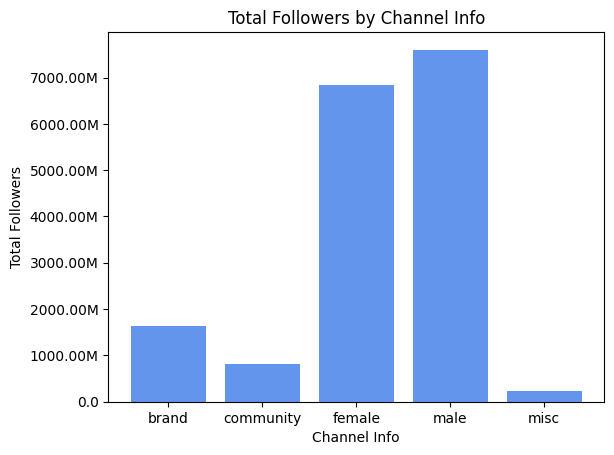


  Highest number of followers are from male: 7600.20M (44.46%) followed by female: 6832.30M (39.97%)


 



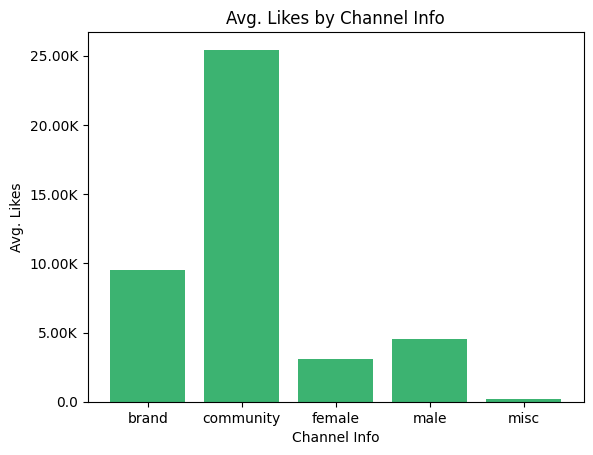


  Highest number of avg. likes are from community: 25.43K (59.52%) followed by brand: 9.48K (22.19%)
 



In [20]:
#plotting graphs for channels

plotBarGraph(
    dfSet=groupedByChannel, 
    x_axis='channel_Info', 
    y_axis='Followers', 
    title='Total Followers by Channel Info', 
    x_label='Channel Info', 
    y_label='Total Followers',
    rotateX=0,
    color= 'cornflowerblue',
    )

printBold(get_largest_values(groupedByChannel,"Followers", "channel_Info")+"\n\n\n")

plotBarGraph(
    dfSet=groupedByChannel, 
    x_axis='channel_Info', 
    y_axis='Avg. Likes', 
    title='Avg. Likes by Channel Info', 
    x_label='Channel Info', 
    y_label='Avg. Likes',
    rotateX=0,
    color='mediumseagreen'
    )

printBold(get_largest_values(groupedByChannel,"Avg. Likes", "channel_Info")+"\n")

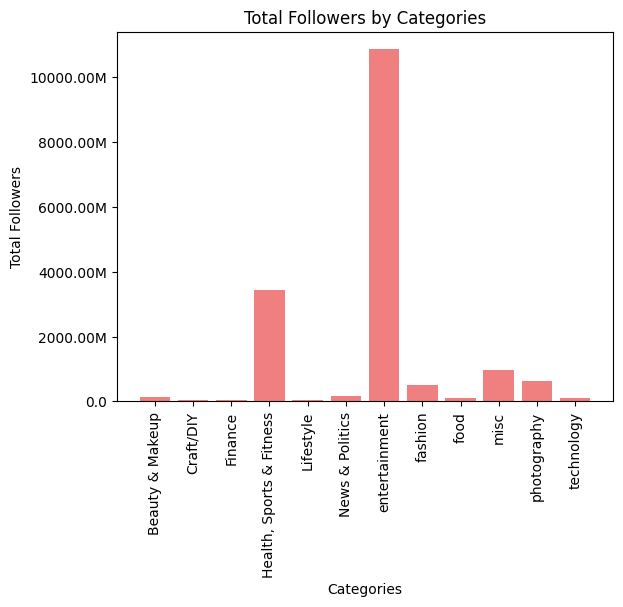


  Highest number of followers are from entertainment: 10859.80M (63.52%) followed by Health, Sports & Fitness: 3438.30M (20.11%)


 



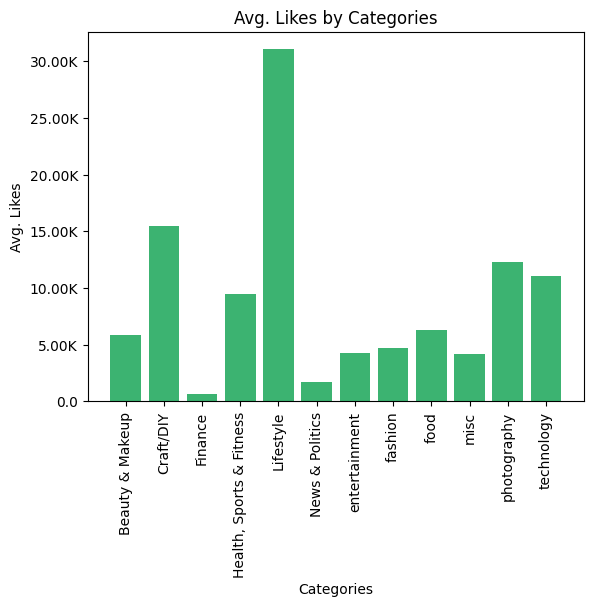


  Highest number of avg. likes are from Lifestyle: 31.04K (28.98%) followed by Craft/DIY: 15.48K (14.46%)
 



In [21]:
#plotting graphs for categories

plotBarGraph(
    dfSet=groupedByCategory,
    x_axis='Category',
    y_axis='Followers',
    title='Total Followers by Categories',
    x_label='Categories',
    y_label='Total Followers',
    rotateX=90,
    color='lightcoral'
    )

printBold(get_largest_values(groupedByCategory,"Followers", "Category")+"\n\n\n")

plotBarGraph(
    dfSet=groupedByCategory,
    x_axis='Category',
    y_axis='Avg. Likes',
    title='Avg. Likes by Categories',
    x_label='Categories',
    y_label='Avg. Likes',
    rotateX=90,
    color='mediumseagreen'
    )

printBold(get_largest_values(groupedByCategory,"Avg. Likes", "Category")+"\n")

In [23]:
#scatter graph
def plotScatterGraph(dfSet,x_axis, y_axis,title,x_label, y_label, color):
    
    fig, ax = plt.subplots()
    ax.scatter(df[x_axis], df[y_axis], c=color)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis_label))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis_label))

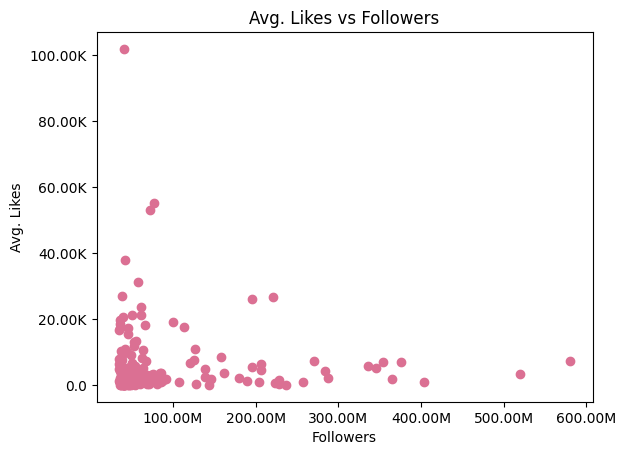

In [24]:
#Finding relationship

plotScatterGraph(
    dfSet=df, 
    x_axis='Followers', 
    y_axis='Avg. Likes', 
    title='Avg. Likes vs Followers', 
    x_label='Followers', 
    y_label='Avg. Likes',
    color = 'palevioletred'
    )

In [25]:
#heatmap to find relation ships
def heatmap(vals, colors, title):
    pivot_df = df.pivot_table(index='Category', columns='channel_Info', values=vals)

    # Create the heatmap with data labels
    sns.heatmap(pivot_df, 
        annot=False, 
        fmt='', 
        cmap=colors, 
        linewidth=.5)
    
    #sns.color_palette(colors)
    plt.title(title)
    plt.show()


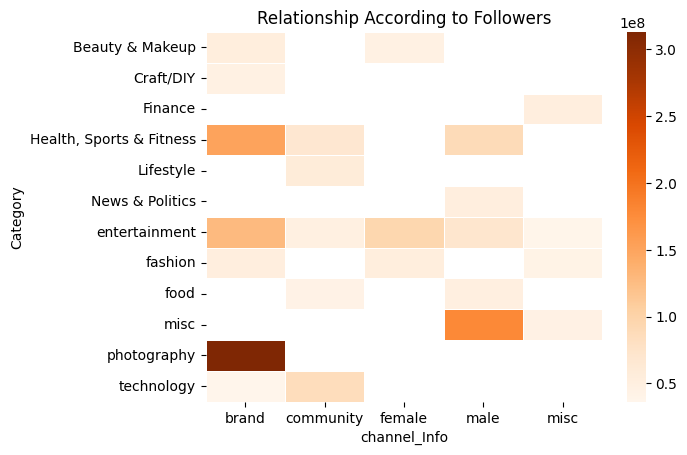

In [26]:
heatmap('Followers','Oranges', 'Relationship According to Followers' )

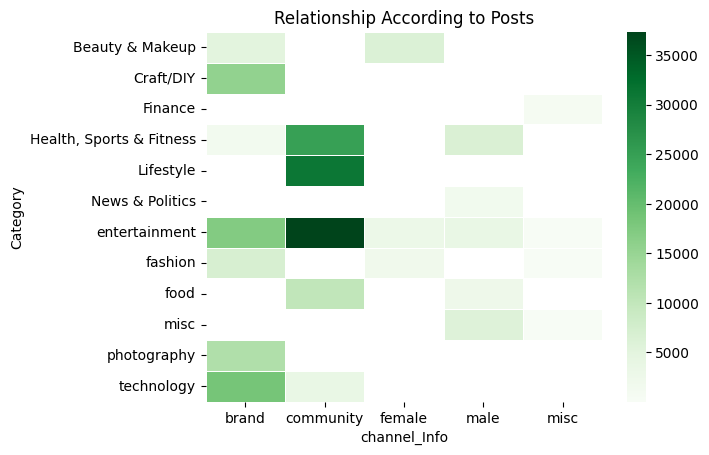

In [27]:
heatmap('Posts', 'Greens', 'Relationship According to Posts')

### *Finding top influencer in each group*
In this section, we will identify the top influencer within each subset of our data by grouping them based on common attributes such as category and channel type. By doing so, we can understand who are the key players within each category and channel type, and use this information to make informed decisions and take action.

In [29]:
def find_top_influencers(df, groupBy):
    df_grouped = df.groupby(groupBy)

    top_influencers = []

    for group_name, group in df_grouped:
        top_influencers_df = group.loc[group['Followers'].idxmax(), ['name', groupBy, 'rank', 'Posts', 'Followers', 'Avg. Likes']]
        top_influencers.append(top_influencers_df)

    top_influencers = pd.DataFrame(top_influencers)
    
    top_influencers = top_influencers[['name', groupBy, 'rank', 'Posts', 'Followers', 'Avg. Likes']]
    top_influencers['Posts'] = top_influencers['Posts'].apply(format_value)
    top_influencers['Followers'] = top_influencers['Followers'].apply(format_value)
    top_influencers['Avg. Likes'] = top_influencers['Avg. Likes'].apply(format_value)
    
    top_influencers = top_influencers.sort_values(by='rank', ascending=True)

    return top_influencers


In [30]:
#Top influencers in each category
printBold('Top influencers in each category')
find_top_influencers(df, "Category")


  Top influencers in each category 



,name,Category,rank,Posts,Followers,Avg. Likes
0,instagram,photography,1,7.30K,580.10M,7.31K
1,cristiano,"Health, Sports & Fitness",2,3.40K,519.90M,3.41K
3,kyliejenner,entertainment,4,7.00K,375.90M,7.02K
14,virat.kohli,misc,15,1.50K,228.00M,1.48K
40,nasa,technology,41,3.70K,85.80M,3.69K
48,gigihadid,fashion,49,3.30K,76.40M,3.29K
56,narendramodi,News & Politics,57,559.0,70.90M,559.0
82,9gag,Lifestyle,83,31.00K,58.10M,31.04K
101,chanelofficial,Beauty & Makeup,102,5.10K,53.50M,5.11K
104,michelleobama,Finance,105,691.0,51.90M,691.0


In [31]:
#Top influencers in each channel
printBold('Top influencers in each channel')
find_top_influencers(df, "channel_Info")


  Top influencers in each channel 



,name,channel_Info,rank,Posts,Followers,Avg. Likes
0,instagram,brand,1,7.30K,580.10M,7.31K
1,cristiano,male,2,3.40K,519.90M,3.41K
3,kyliejenner,female,4,7.00K,375.90M,7.02K
33,realmadrid,community,34,6.50K,120.90M,6.53K
104,michelleobama,misc,105,691.0,51.90M,691.0


### Key Points Summary

The top 5 Instagram influencers include Instagram, Cristiano Ronaldo, Leo Messi, and Kylie Jenner, Selenagomez.

The dataset provides information on the rank, name, channel information, category, posts, followers, average likes, engagement rate, and count for each influencer.

Instagram is a brand account, while the other four influencers are individuals with a male or female gender.

The top two influencers (male), Cristiano Ronaldo and Leo Messi, are both in the Health, Sports & Fitness category, while Kylie Jenner and Selenagomez (female) is in the entertainment category.

The number of posts varies widely among the influencers, ranging from 1k to 101K.

The follower count for each influencer is in the hundreds of millions.

Engagement rates also vary, with some influencers having rates as low as 0.1% and others as high as 26.6%.


### Categories and Channels 

One of the key insights that can be gained from this dataset is the most popular categories and channels on Instagram. By examining the data, we can see that the Health, Sports & Fitness category is a popular one in non brand, with two of the top five influencers belonging to this category. Additionally, the entertainment category is also popular, with Kylie Jenner being a top influencer in this category.

### Follower Counts

Another important factor to consider when analyzing Instagram influencers is their follower count. The four influencers in this dataset have a combined follower count of over 17 billion, with Instagram having the most followers at 580 million. Having a large follower count is essential for influencers since it allows them to reach a vast audience and promote products to a broad customer base.

### Engagement Rates
While follower count is essential, engagement rates are also a crucial factor to consider when analyzing Instagram influencers. Engagement rates measure the level of interaction between the influencer and their audience, and can be a useful metric for businesses looking to work with influencers. In this dataset, we can see that engagement rates vary widely, ranging from 0.1% to 26.6%.

### Conclusion
Overall, this dataset provides valuable insights into the top Instagram influencers, their categories, follower counts, and engagement rates. By analyzing this information, we can gain a better understanding of the factors that contribute to their success on the platform. Businesses looking to work with influencers can use this data to identify the most popular categories and channels, as well as to select influencers with high follower counts and engagement rates.